In [98]:
# Finance & Accounting Courses Analysis - Jupyter Notebook

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [99]:


# Step 2: Load Dataset
file_path = 'udemy_output_All_Finance__Accounting_p1_p626.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [100]:
# Display statistical summary of numerical columns
print(data.describe())




                 id  num_subscribers    avg_rating  avg_rating_recent  \
count  1.360800e+04     13608.000000  13608.000000       13608.000000   
mean   1.681721e+06      2847.010435      3.923293           3.912242   
std    9.539271e+05      9437.865634      1.031304           1.039237   
min    2.762000e+03         0.000000      0.000000           0.000000   
25%    8.580862e+05        62.000000      3.800000           3.787315   
50%    1.623421e+06       533.000000      4.194440           4.181735   
75%    2.503720e+06      2279.500000      4.450000           4.452105   
max    3.486006e+06    374836.000000      5.000000           5.000000   

             rating   num_reviews  num_published_lectures  \
count  13608.000000  13608.000000            13608.000000   
mean       3.912242    243.169827               32.224794   
std        1.039237   1580.965895               42.766911   
min        0.000000      0.000000                0.000000   
25%        3.787315      7.000000    

In [101]:
# Display count of null values in each column
print(data.isnull().sum())


id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
discount_price__currency        1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
dtype: int64


In [122]:
# Step 3: Data Cleaning
# Drop unnecessary columns
columns_to_drop = [
    'url', 'discount_price__price_string', 'price_detail__price_string',
    'discount_price__currency', 'price_detail__currency', 'avg_rating_recent'
]
data = data.drop(columns=columns_to_drop, errors='ignore')
data.head()



,id,title,is_paid,num_subscribers,avg_rating,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,discount_percentage,category
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,False,84,0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,455.0,8640.0,94.733796,Database
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,False,78,0,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49+00:00,455.0,8640.0,94.733796,Data Science
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,False,292,2,2017-09-26 16:32:48+00:00,2017-11-14 23:58:14+00:00,455.0,8640.0,94.733796,Management
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,False,338,0,2015-10-23 13:34:35+00:00,2016-01-21 01:38:48+00:00,455.0,8640.0,94.733796,Other
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,False,83,0,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33+00:00,455.0,8640.0,94.733796,Business


In [124]:
# Handle missing values
data['discount_price__amount'] = data['discount_price__amount'].fillna(data['discount_price__amount'].median())
data['price_detail__amount'] = data['price_detail__amount'].fillna(data['price_detail__amount'].median())
data.isnull().sum()

id                              0
title                           0
is_paid                         0
num_subscribers                 0
avg_rating                      0
rating                          0
num_reviews                     0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
created                         0
published_time                  0
discount_price__amount          0
price_detail__amount            0
discount_percentage             0
category                        0
dtype: int64

In [125]:
# Convert date columns to datetime
data['created'] = pd.to_datetime(data['created'])
data['published_time'] = pd.to_datetime(data['published_time'])
data.head()

,id,title,is_paid,num_subscribers,avg_rating,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,discount_percentage,category
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,False,84,0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,455.0,8640.0,94.733796,Database
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,False,78,0,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49+00:00,455.0,8640.0,94.733796,Data Science
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,False,292,2,2017-09-26 16:32:48+00:00,2017-11-14 23:58:14+00:00,455.0,8640.0,94.733796,Management
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,False,338,0,2015-10-23 13:34:35+00:00,2016-01-21 01:38:48+00:00,455.0,8640.0,94.733796,Other
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,False,83,0,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33+00:00,455.0,8640.0,94.733796,Business


In [105]:
# Step 4: Feature Engineering
# Add discount percentage feature
data['discount_percentage'] = (
    (data['price_detail__amount'] - data['discount_price__amount']) / data['price_detail__amount']
) * 100

In [106]:
# Categorize courses based on titles
def categorize_title(title):
    title_lower = str(title).lower()
    if 'sql' in title_lower or 'database' in title_lower:
        return 'Database'
    elif 'excel' in title_lower or 'spreadsheet' in title_lower:
        return 'Spreadsheet'
    elif 'finance' in title_lower or 'accounting' in title_lower:
        return 'Finance'
    elif 'business' in title_lower or 'mba' in title_lower:
        return 'Business'
    elif 'marketing' in title_lower or 'sales' in title_lower:
        return 'Sales/Marketing'
    elif 'management' in title_lower or 'pmp' in title_lower:
        return 'Management'
    elif 'data science' in title_lower or 'analytics' in title_lower:
        return 'Data Science'
    else:
        return 'Other'

data['category'] = data['title'].apply(categorize_title)

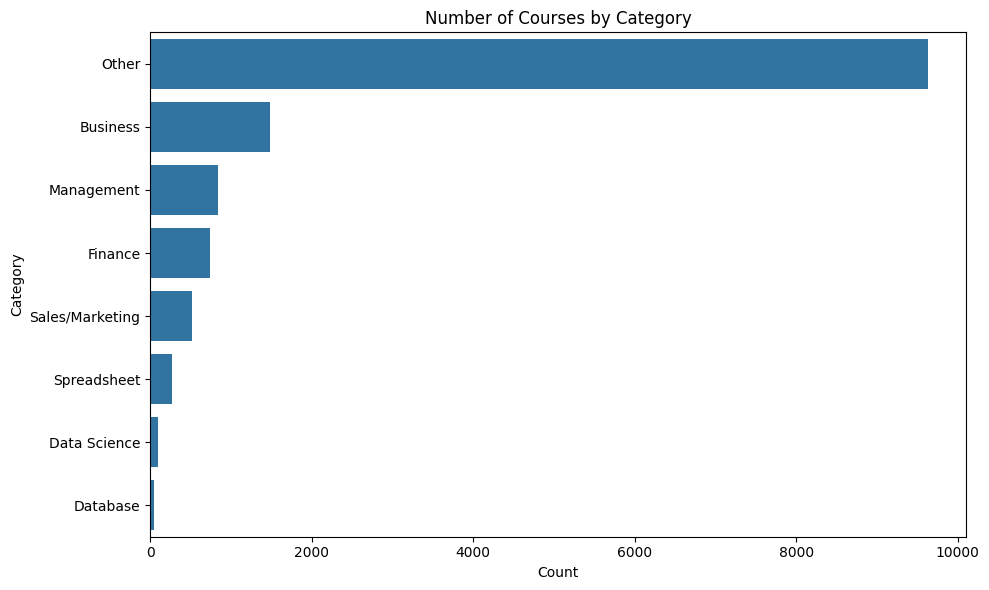

In [107]:

# Step 5: Exploratory Data Analysis (EDA)
# Visualization 1: Number of courses by category
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=data, order=data['category'].value_counts().index)
plt.title("Number of Courses by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

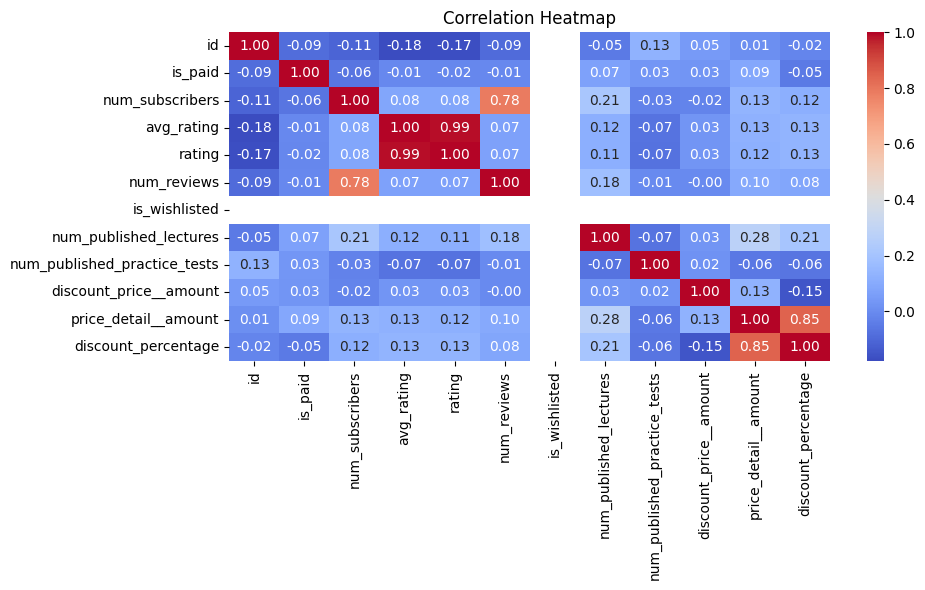

In [108]:

# Visualization 2: Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [109]:

# Step 6: Predictive Modeling
# Select features and target for prediction
features = ['num_reviews', 'num_published_lectures', 'discount_price__amount', 'price_detail__amount']
target = 'num_subscribers'

X = data[features]
y = data[target]

In [110]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [111]:

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [112]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 38844581.345396586
R-squared (R²): 0.6751771881627948


In [113]:
#predicting subscribers
finance_data = data[data['title'].str.contains('finance|accounting', case=False, na=False)]
feature = ['num_reviews', 'num_published_lectures', 'discount_price__amount', 'price_detail__amount', 'discount_percentage']
X_subscribers = finance_data[feature]
y_subscribers = finance_data['num_subscribers']

#predicting ratings

X_ratings = finance_data[features]
y_ratings = finance_data['avg_rating']

In [114]:

#Train-Test Split
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subscribers, y_subscribers, test_size=0.2, random_state=42)
X_train_rat, X_test_rat, y_train_rat, y_test_rat = train_test_split(X_ratings, y_ratings, test_size=0.2, random_state=42)


In [115]:

# Model for Subscribers
model_subscribers = RandomForestRegressor(n_estimators=100, random_state=42)
model_subscribers.fit(X_train_sub, y_train_sub)

# Model for Ratings
model_ratings = RandomForestRegressor(n_estimators=100, random_state=42)
model_ratings.fit(X_train_rat, y_train_rat)

RandomForestRegressor(random_state=42)

In [116]:
# Predictions for Subscribers
y_pred_sub = model_subscribers.predict(X_test_sub)
mse_sub = mean_squared_error(y_test_sub, y_pred_sub)
r2_sub = r2_score(y_test_sub, y_pred_sub)

# Predictions for Ratings
y_pred_rat = model_ratings.predict(X_test_rat)
mse_rat = mean_squared_error(y_test_rat, y_pred_rat)
r2_rat = r2_score(y_test_rat, y_pred_rat)

In [117]:
# Print Evaluation Metrics
print("Subscribers Prediction:")
print(f"Mean Squared Error (MSE): {mse_sub}")
print(f"R-squared (R²): {r2_sub}")

print("\nRatings Prediction:")
print(f"Mean Squared Error (MSE): {mse_rat}")
print(f"R-squared (R²): {r2_rat}")

Subscribers Prediction:
Mean Squared Error (MSE): 28451028.9083437
R-squared (R²): 0.586345715811574

Ratings Prediction:
Mean Squared Error (MSE): 0.3403576148352636
R-squared (R²): 0.8143260427275818


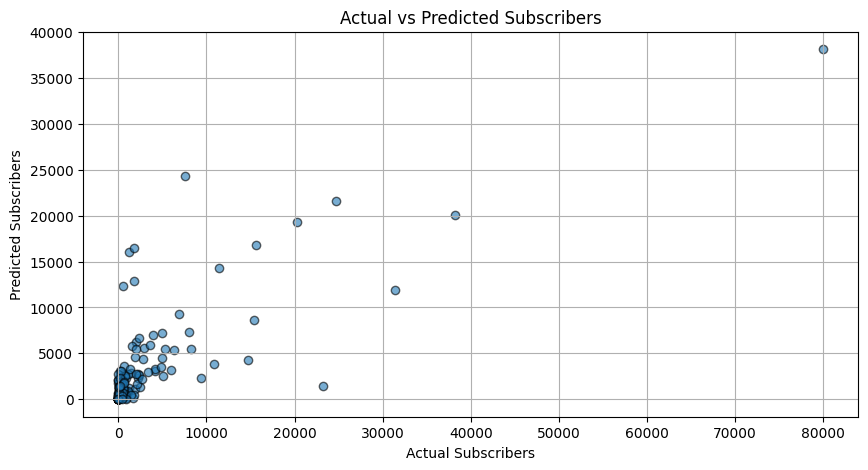

In [118]:
#Visualization 
# Subscribers - Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test_sub, y_pred_sub, alpha=0.6, edgecolors='k')
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")
plt.title("Actual vs Predicted Subscribers")
plt.grid()
plt.show()

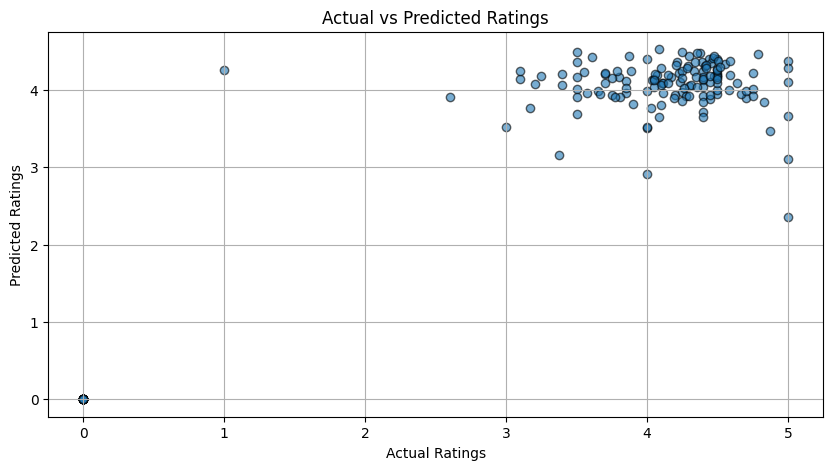

In [119]:
# Ratings - Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test_rat, y_pred_rat, alpha=0.6, edgecolors='k')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.grid()
plt.show()

TOP 10 COURSES BASED ON SUBSCRIBERS


C:\Users\nst\AppData\Local\Temp\ipykernel_4772\82367645.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


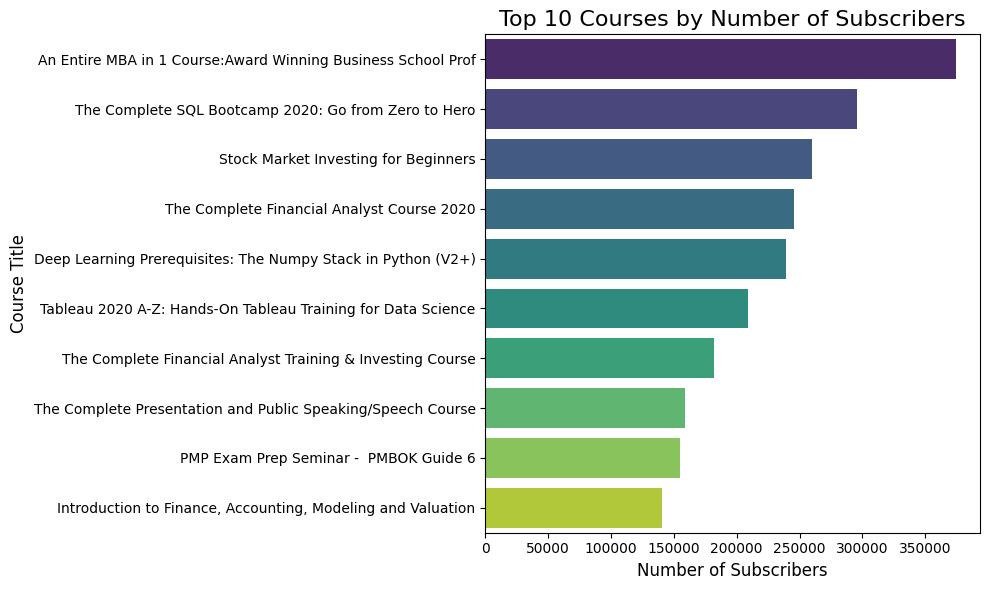

In [120]:

# Handle missing values in the number of subscribers column
data['num_subscribers'] = data['num_subscribers'].fillna(0)

#Extract the Top 10 Courses by Number of Subscribers
top_10_courses = data.nlargest(10, 'num_subscribers')[['title', 'num_subscribers']]

#Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='num_subscribers', 
    y='title', 
    data=top_10_courses, 
    palette='viridis'
)
plt.title("Top 10 Courses by Number of Subscribers", fontsize=16)
plt.xlabel("Number of Subscribers", fontsize=12)
plt.ylabel("Course Title", fontsize=12)
plt.tight_layout()
plt.show()

In [121]:

print(data[['price_detail__amount', 'discount_price__amount']].describe())


       price_detail__amount  discount_price__amount
count          13608.000000            13608.000000
mean            4594.144621              489.928645
std             3063.840722              253.920382
min             1280.000000              455.000000
25%             1600.000000              455.000000
50%             3200.000000              455.000000
75%             8640.000000              455.000000
max            12800.000000             3200.000000
